In [1]:
# import data manipulation liabrary
import pandas as pd
import numpy as np
df = pd.read_csv('Titanic.csv')
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [2]:
#  Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [3]:
# Checking Missing Values information
df.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

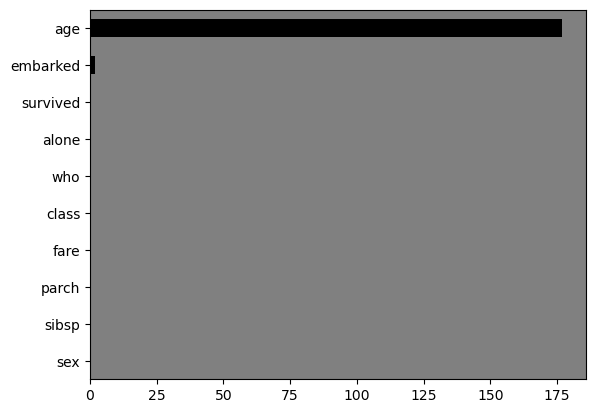

In [4]:
# Checking Missing Values information and creating graph
ax=df.isnull().sum().sort_values(ascending= True).plot(kind = 'barh',color = 'black')
ax.set_facecolor('gray')

In [5]:
# Imputation statergy
''' 
1. Mean : Average
2. Median : Central Value
3. any random constant value
'''
print('Missing values present in the age coum:',df['age'].isnull().sum()/len(df)*100)

Missing values present in the age coum: 19.865319865319865


In [6]:
df['age'].median(),df['age'].mean()


(28.0, 29.69911764705882)

In [7]:
df['age'].fillna(df['age'].median(),inplace = True)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10272\2134434862.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace = True)


In [8]:
print('Missing values present in the age coum:',df['age'].isnull().sum()/len(df)*100)

Missing values present in the age coum: 0.0


In [9]:
df['embarked'].fillna('S',inplace = True)

C:\Users\Rahul\AppData\Local\Temp\ipykernel_10272\1436119802.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna('S',inplace = True)


In [10]:
print('Missing values present in the Embarked column:',df['embarked'].isnull().sum()/len(df)*100)

Missing values present in the Embarked column: 0.0


In [11]:
df['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

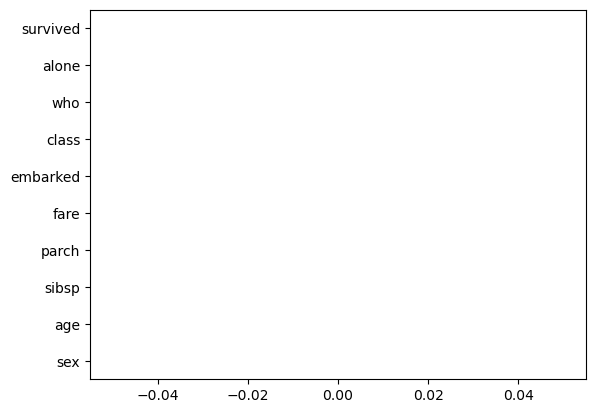

In [12]:
ax=df.isnull().sum().sort_values(ascending= True).plot(kind = 'barh',color = 'black')
ax.set_facecolor('white')

In [13]:
# Segregate numerical_columns and categorical_column

categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [14]:
# Using Encoding Technique

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])
        
df



,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,2,2,1,False,0
1,0,38.0,1,0,71.2833,0,0,2,False,1
2,0,26.0,0,0,7.9250,2,2,2,True,1
3,0,35.0,1,0,53.1000,2,0,2,False,1
4,1,35.0,0,0,8.0500,2,2,1,True,0
...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,2,1,1,True,0
887,0,19.0,0,0,30.0000,2,0,2,True,1
888,0,28.0,1,2,23.4500,2,2,2,False,0
889,1,26.0,0,0,30.0000,0,0,1,True,1


In [15]:
# Converting Boolean datatype into int
df['alone'] = df['alone'].astype(int)

In [16]:
df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,2,2,1,0,0
1,0,38.0,1,0,71.2833,0,0,2,0,1
2,0,26.0,0,0,7.9250,2,2,2,1,1
3,0,35.0,1,0,53.1000,2,0,2,0,1
4,1,35.0,0,0,8.0500,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,2,1,1,1,0
887,0,19.0,0,0,30.0000,2,0,2,1,1
888,0,28.0,1,2,23.4500,2,2,2,0,0
889,1,26.0,0,0,30.0000,0,0,1,1,1


In [ ]:


'''  
DATA LEACKAGE:

Step1 : Split dataset into X and y
        X: Independent columns
        y: Dependent columns / Target column
        
Step2 : Split dataset into train and test
        X_train : Seen Data : 70%
        X_train : Unseen Data : 30%
        ----------------------------------
        y_train : Seen Data : 70%
        y_test : Unseen Data : 30%
        
Step3 : If you are solving Classification Model / Recommanded model
        then use Imbalance Technique.
        A] Over Sampling Technique:
            1.SMOTE 2.SMOTEN 3.SMOTENC
        B] Under Sampling Technique:
            1.ClusteredCentroid 2.ALLKnn 
            
Step4 : Use Proper Scaling Technique Based on Dataset...
        Scaling technique:
        1. MinMax Scalar: When dataset is Non Normal distributed
        2. Standard Scalar: When dataset is Normally distributed
        3. Robust Scalar: When dataset is Non Normal Distributed and Model is Sensative
        to outliers i.e when model overfit
        
Step5 : Model Building
'''
# In Titanic dataset the target column is imbalanced in nature.
# So hence use imbalanced technique as this model is classificationn type
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
# Step1

X = df.drop(columns= 'survived' , axis = 1)
y = df['survived']

In [22]:
# Step2

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
random_state =  42)


In [23]:
# Step3

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train,y_train = sm.fit_resample(X_train,y_train)

In [24]:
y_train.value_counts()

survived
0    444
1    444
Name: count, dtype: int64

In [25]:
# Step4

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8100558659217877

<Axes: xlabel='survived'>

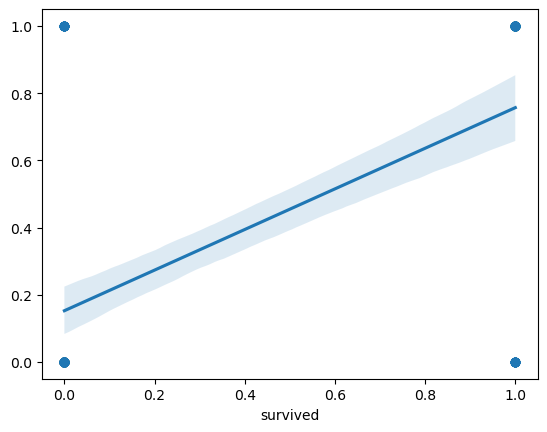

In [31]:
import seaborn as sns
sns.regplot(x = y_test,y = y_pred)

In [ ]:
# Minimum number of rows required for machine learning model = 20 * No of Independent Columns